In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'personal-key-indicators-of-heart-disease:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1936563%2F6674905%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240611%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240611T165319Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6b5f76e943552237d04e1bdea56b683b3dbc1ce501ed7ce1ba66ceda53f0d99898050a594190cd6a90d540b3c09926776bfcd209ffd8c3a84ebcc6edc6c0ab3be652b15380884e29b222d90ffb4064887e45735b49b24b5e696413f8a597096834cfac2373b2becd5cdb8d2971f68d2797b9753066973aceaf8e6355bcab81a99ad80a627bee1adac21d32297ca24945caee43e9ea9ca642526415aae842d450aa6d81b974dcad2d7520112623a75189d02b054f6149b194b70c8ccfb3fed2d2826a5105c9affe85151653b16967a588a4dff2ea53243f939b74bdbd061aceb0ce6216b08c378624c2793a42c435e8fc7ebb345134159942d343692d1cb5f889'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data["HeartDisease"].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [ ]:
data["KidneyDisease"].value_counts()

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64

In [ ]:
data["SkinCancer"].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

In [ ]:
data.drop("SkinCancer", inplace=True, axis = 1)

## Data Exploration

In [ ]:
data["HeartDisease"] = data["HeartDisease"].map({'Yes':1,'No':0})

In [ ]:
data["Smoking"].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [ ]:
data["Smoking"] = data["Smoking"].map({'Yes':1,'No':0})
data["AlcoholDrinking"] = data["AlcoholDrinking"].map({'Yes':1,'No':0})
data["Stroke"] = data["Stroke"].map({'Yes':1,'No':0})
data["DiffWalking"] = data["DiffWalking"].map({'Yes':1,'No':0})
data["Sex"] = data["Sex"].map({'Male':1,'Female':0})
data["PhysicalActivity"] = data["PhysicalActivity"].map({'Yes':1,'No':0})
data["Asthma"] = data["Asthma"].map({'Yes':1,'No':0})
data["KidneyDisease"] = data["KidneyDisease"].map({'Yes':1,'No':0})
data["Diabetic"] = data["Diabetic"].map({'No':0,'Yes':1,'No, borderline diabetes':0,'Yes (during pregnancy)':1})
data["GenHealth"] = data["GenHealth"].map({'Excellent':5,"Very good":4,"Good":3,"Fair":2,"Poor":1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
num_col = list(data.columns)

In [ ]:
num_col.remove("AgeCategory")
num_col.remove("Race")

In [ ]:
num_col

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease']

Text(0.5, 1.0, 'Correlation Matrix')

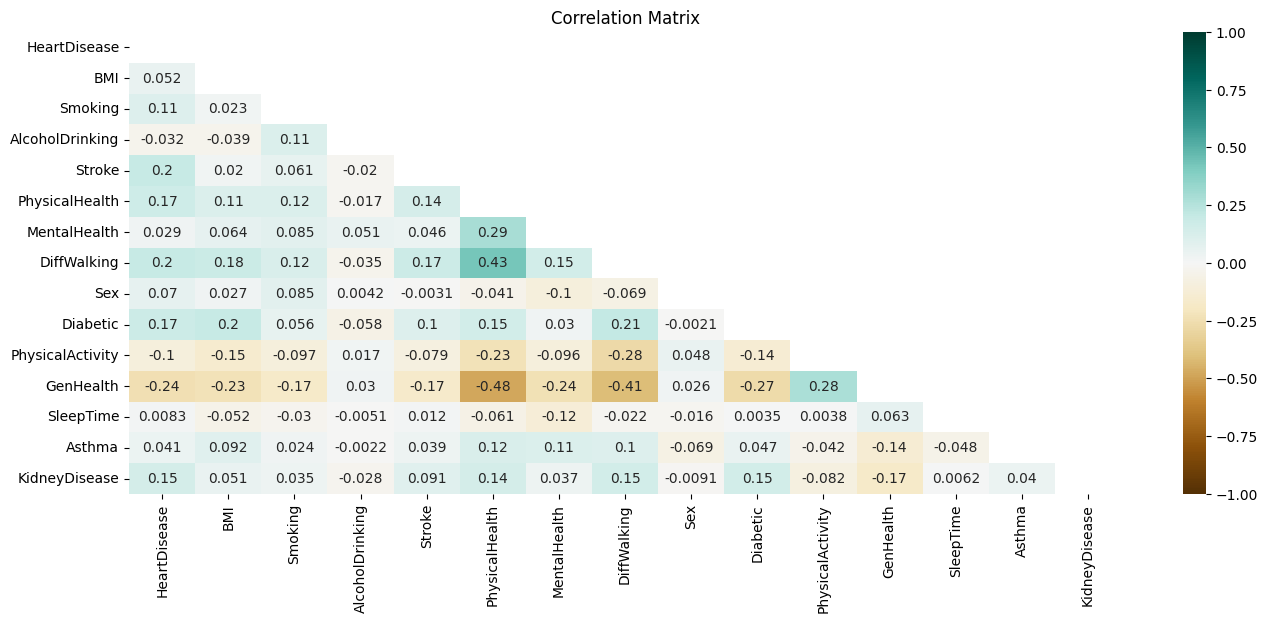

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(data[num_col].corr()))

heatmap = sns.heatmap(data[num_col].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG")

heatmap.set_title("Correlation Matrix")

In [ ]:
data.to_csv("cleaned_data.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Encode categorical variables
categorical_columns = ['Sex', 'AgeCategory', 'Race', 'GenHealth']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [ ]:
# Handling missing values (if any)
data_encoded = data_encoded.dropna()

In [ ]:
# Features and target variable for Heart Disease
X_heart = data_encoded.drop(columns=['HeartDisease'])
y_heart = data_encoded['HeartDisease']

In [ ]:
# Splitting the data into training and testing sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [ ]:
# Normalizing the data
scaler = StandardScaler()
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)

In [ ]:
# Logistic Regression for Heart Disease
lr_heart = LogisticRegression(max_iter=1000)
lr_heart.fit(X_train_heart, y_train_heart)
y_pred_lr_heart = lr_heart.predict(X_test_heart)

In [ ]:
# Random Forest for Heart Disease
rf_heart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_heart.fit(X_train_heart, y_train_heart)
y_pred_rf_heart = rf_heart.predict(X_test_heart)

In [ ]:
# Evaluation
accuracy_lr_heart = accuracy_score(y_test_heart, y_pred_lr_heart)
accuracy_rf_heart = accuracy_score(y_test_heart, y_pred_rf_heart)

In [ ]:
# Classification reports
report_lr_heart = classification_report(y_test_heart, y_pred_lr_heart)
report_rf_heart = classification_report(y_test_heart, y_pred_rf_heart)

accuracy_lr_heart, accuracy_rf_heart, report_lr_heart, report_rf_heart

(0.9136478056254789,
 0.9008739974045873,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95     58367\n           1       0.53      0.10      0.17      5592\n\n    accuracy                           0.91     63959\n   macro avg       0.73      0.55      0.56     63959\nweighted avg       0.89      0.91      0.89     63959\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     58367\n           1       0.32      0.12      0.18      5592\n\n    accuracy                           0.90     63959\n   macro avg       0.62      0.55      0.56     63959\nweighted avg       0.87      0.90      0.88     63959\n')

In [ ]:
X_kidney = data_encoded.drop(columns=['KidneyDisease'])
y_kidney = data_encoded['KidneyDisease']

In [ ]:
# Splitting the data into training and testing sets
X_train_kidney, X_test_kidney, y_train_kidney, y_test_kidney = train_test_split(X_kidney, y_kidney, test_size=0.2, random_state=42)

In [ ]:
# Normalizing the data
X_train_kidney = scaler.fit_transform(X_train_kidney)
X_test_kidney = scaler.transform(X_test_kidney)


In [ ]:
# Logistic Regression for Kidney Disease
lr_kidney = LogisticRegression(max_iter=1000)
lr_kidney.fit(X_train_kidney, y_train_kidney)
y_pred_lr_kidney = lr_kidney.predict(X_test_kidney)

In [ ]:
# Random Forest for Kidney Disease
rf_kidney = RandomForestClassifier(n_estimators=100, random_state=42)
rf_kidney.fit(X_train_kidney, y_train_kidney)
y_pred_rf_kidney = rf_kidney.predict(X_test_kidney)

In [ ]:
# Evaluation
accuracy_lr_kidney = accuracy_score(y_test_kidney, y_pred_lr_kidney)
accuracy_rf_kidney = accuracy_score(y_test_kidney, y_pred_rf_kidney)

In [ ]:
# Classification reports
report_lr_kidney = classification_report(y_test_kidney, y_pred_lr_kidney)
report_rf_kidney = classification_report(y_test_kidney, y_pred_rf_kidney)

In [ ]:
# Display Results
print(f"Heart Disease Prediction - Logistic Regression Accuracy: {accuracy_lr_heart}")
print(f"Heart Disease Prediction - Random Forest Accuracy: {accuracy_rf_heart}")
print(f"Classification Report for Heart Disease (Logistic Regression):\n{report_lr_heart}")
print(f"Classification Report for Heart Disease (Random Forest):\n{report_rf_heart}")
print(f"Kidney Disease Prediction - Logistic Regression Accuracy: {accuracy_lr_kidney}")
print(f"Kidney Disease Prediction - Random Forest Accuracy: {accuracy_rf_kidney}")
print(f"Classification Report for Kidney Disease (Logistic Regression):\n{report_lr_kidney}")
print(f"Classification Report for Kidney Disease (Random Forest):\n{report_rf_kidney}")

Heart Disease Prediction - Logistic Regression Accuracy: 0.9136478056254789
Heart Disease Prediction - Random Forest Accuracy: 0.9008739974045873
Classification Report for Heart Disease (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959

Classification Report for Heart Disease (Random Forest):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.32      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959

Kidney Disease Prediction - Logistic Regression Accuracy: 0.9632420769555496
Kid

In [ ]:
# Encode categorical variables
categorical_columns = ['Sex', 'AgeCategory', 'Race']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Features and target variable for GenHealth
X_genhealth = data_encoded.drop(columns=['GenHealth'])
y_genhealth = data_encoded['GenHealth']

In [ ]:
# Splitting the data into training and testing sets
X_train_genhealth, X_test_genhealth, y_train_genhealth, y_test_genhealth = train_test_split(X_genhealth, y_genhealth, test_size=0.2, random_state=42)

In [ ]:
# Normalizing the data
scaler = StandardScaler()
X_train_genhealth = scaler.fit_transform(X_train_genhealth)
X_test_genhealth = scaler.transform(X_test_genhealth)

In [ ]:
# Logistic Regression for GenHealth
lr_genhealth = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_genhealth.fit(X_train_genhealth, y_train_genhealth)
y_pred_lr_genhealth = lr_genhealth.predict(X_test_genhealth)

In [ ]:
# Random Forest for GenHealth
rf_genhealth = RandomForestClassifier(n_estimators=100, random_state=42)
rf_genhealth.fit(X_train_genhealth, y_train_genhealth)
y_pred_rf_genhealth = rf_genhealth.predict(X_test_genhealth)

In [ ]:
# Evaluation
accuracy_lr_genhealth = accuracy_score(y_test_genhealth, y_pred_lr_genhealth)
accuracy_rf_genhealth = accuracy_score(y_test_genhealth, y_pred_rf_genhealth)

In [ ]:
# Classification reports
report_lr_genhealth = classification_report(y_test_genhealth, y_pred_lr_genhealth)
report_rf_genhealth = classification_report(y_test_genhealth, y_pred_rf_genhealth)


In [ ]:
# Display results
print(f"GenHealth Prediction - Logistic Regression Accuracy: {accuracy_lr_genhealth}")
print(f"GenHealth Prediction - Random Forest Accuracy: {accuracy_rf_genhealth}")
print(f"Classification Report for GenHealth (Logistic Regression):\n{report_lr_genhealth}")
print(f"Classification Report for GenHealth (Random Forest):\n{report_rf_genhealth}")

GenHealth Prediction - Logistic Regression Accuracy: 0.45219593802279584
GenHealth Prediction - Random Forest Accuracy: 0.4010694351068653
Classification Report for GenHealth (Logistic Regression):
              precision    recall  f1-score   support

           1       0.53      0.37      0.44      2201
           2       0.44      0.26      0.33      6963
           3       0.45      0.39      0.42     18698
           4       0.45      0.70      0.55     22776
           5       0.46      0.23      0.31     13321

    accuracy                           0.45     63959
   macro avg       0.47      0.39      0.41     63959
weighted avg       0.45      0.45      0.43     63959

Classification Report for GenHealth (Random Forest):
              precision    recall  f1-score   support

           1       0.47      0.39      0.43      2201
           2       0.36      0.31      0.33      6963
           3       0.39      0.42      0.40     18698
           4       0.44      0.46      0.45

In [ ]:
import pickle

In [ ]:
# save the model
pickle.dump(rf_heart, open("rf_heart.pkl", "wb"))

In [ ]:
pickle.dump(rf_kidney, open("rf_kidney.pkl", "wb"))

In [ ]:
pickle.dump(rf_genhealth, open("rf_genhealth.pkl", "wb"))